# **Setup**

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

df_uk = pd.read_csv('df_uk.csv')
df_uk.head()

/var/folders/j2/dgz87tgd2wv8fr4rj3chms_c0000gn/T/ipykernel_33128/59302731.py:7: DtypeWarning: Columns (0,11,33,35,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_uk = pd.read_csv('df_uk.csv')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,27083,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1472223782,2016-08-26T15:03:02Z,1550256477,2019-02-15T18:47:57Z,teolemon,1.707491e+09,2024-02-09T15:03:42Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50913,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1483186707,2016-12-31T12:18:27Z,1550256781,2019-02-15T18:53:01Z,teolemon,1.707491e+09,2024-02-09T15:03:52Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56434,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1468005372,2016-07-08T19:16:12Z,1547756462,2019-01-17T20:21:02Z,teolemon,1.707490e+09,2024-02-09T14:47:57Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,673358,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1483117649,2016-12-30T17:07:29Z,1483117649,2016-12-30T17:07:29Z,canieatthis-app,1.707490e+09,2024-02-09T14:48:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1674665348,2023-01-25T16:49:08Z,1674665348,2023-01-25T16:49:08Z,NaN,1.707875e+09,2024-02-14T01:50:21Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
df_uk.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'last_modified_by',
       'last_updated_t', 'last_updated_datetime',
       ...
       'glycemic-index_100g', 'water-hardness_100g', 'choline_100g',
       'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g',
       'carnitine_100g', 'sulphate_100g', 'nitrate_100g', 'acidity_100g'],
      dtype='object', length=206)

In [341]:
# list of useful columns
cols = [
    'code',
    'url',
    'product_name',
    'quantity',
    'packaging_tags',
    'packaging_en',
    'packaging_text',
    'categories_en',
    'origins_en',
    'labels_en',
    'countries_en',
    'ingredients_tags',
    'ingredients_analysis_tags',
    'allergens_en',
    'traces_en',
    'serving_size',
    'serving_quantity',
    'additives_n',
    'additives_en',
    'nutriscore_score',
    'nutriscore_grade',
    'nova_group',
    'food_groups',
    'food_groups_en',
    'brand_owner',
    'ecoscore_score',
    'ecoscore_grade',
    'nutrient_levels_tags',
    'product_quantity',
    'completeness',
    'main_category',
    'main_category_en',
    'image_url',
    'image_ingredients_url',
    'image_nutrition_url',
    'energy-kcal_100g',
    'fat_100g',
    'saturated-fat_100g',
    'unsaturated-fat_100g',
    'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g',
    'carbohydrates_100g',
    'sugars_100g',
    'added-sugars_100g',
    'fiber_100g',
    'proteins_100g',
    'salt_100g',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g',
    'nutrition-score-uk_100g',
    'glycemic-index_100g',
]

df_uk = df_uk[cols]

# **Exploration**

In [342]:
categories = np.array([])

for i in search['main_category_en']:
    if i is not np.nan:
        categories = np.unique(np.append(categories, i.split(',')))

**Main Food Categories**

The main food categories identified from the list above

Here are the main food categories identified from the list:

1. **Beverages**: Aloe Vera drinks, Apple juices, Carbonated drinks, Chocolate drinks, Coffee drinks, Energy drinks, Flavored waters, Fruit juices, Kombuchas, Smoothies, Teas, Waters, Wine, Beer.

2. **Bakery Products**: Bagels, Baguettes, Baked goods, Biscuits, Bread, Cakes, Croissants, Doughnuts, Muffins, Pastries, Pies, Rolls, Scones, Tarts, Tortillas, Wraps.

3. **Dairy and Alternatives**: Butter, Cheeses, Creams, Milk, Yogurts, Dairy-free products, Plant-based milk, Soy-based drinks, Fermented milk drinks.

4. **Snacks and Confectionery**: Chips, Chocolate bars, Cookies, Crackers, Gummy candies, Popcorn, Pretzels, Snack bars, Sweets, Candy.

5. **Meats and Alternatives**: Bacon, Beef, Chicken, Fish, Ham, Meatballs, Pork, Sausages, Turkey, Vegetarian meat alternatives, Vegan products.

6. **Fruits and Vegetables**: Apples, Avocados, Bananas, Berries, Citrus, Grapes, Melons, Peaches, Pears, Pineapples, Plums, Tomatoes, Leafy greens, Root vegetables, Legumes, Pulses.

7. **Seafood**: Fish fillets, Shrimp, Salmon, Cod, Mackerel, Tuna.

8. **Grains and Cereals**: Bread, Cereal bars, Cornflakes, Muesli, Oats, Pasta, Quinoa, Rice.

9. **Prepared and Convenience Foods**: Canned foods, Instant noodles, Frozen meals, Microwave meals, Ready-to-eat meals, Meal kits.

10. **Sauces and Condiments**: Aioli, Balsamic vinegar, Barbecue sauce, Dressings, Ketchup, Mustard, Mayonnaise, Pesto, Salsa, Soy sauce.

11. **Spreads and Dips**: Butter, Jam, Peanut butter, Spreads, Hummus.

12. **Soups and Broths**: Broths, Canned soups, Dehydrated soups, Instant soups, Cream soups.

13. **Desserts and Sweets**: Ice cream, Pudding, Cheesecake, Mousse, Trifle, Jelly, Custard.

14. **Frozen Foods**: Frozen vegetables, Frozen fruits, Frozen meals, Ice cream, Sorbet.

15. **Baking Ingredients and Mixes**: Flour, Yeast, Baking powder, Cake mixes, Baking decorations.

16. **Nuts and Seeds**: Almonds, Cashews, Peanuts, Seeds, Mixed nuts.

17. **Herbs and Spices**: Basil, Coriander, Ginger, Pepper, Salt, Seasoning blends.

18. **Oils and Fats**: Olive oil, Sunflower oil, Vegetable oil, Margarine.

19. **Legumes and Pulses**: Beans, Lentils, Chickpeas, Peas.

20. **Specialty Foods**: Gluten-free products, Lactose-free products, Organic foods, Vegan foods.

# **Hypothesis Testing**

## **Hypothesis 01**

**H0:** The majority of the recorded foods are not ultra-processed foods (UPFs).

**H1:** The majority of the recorded foods are ultra-processed foods (UPFs).

**Test:** Proportion Test

**Justification:** Large enough sample size for normal approximation. This method is suitable for testing if the observed proportion of UPFs in the dataset is significantly different from the hypothesised proportion.

**Limitations:** Limited scope for hypotheses as this test does not provide detailed insight into other aspects of the data.

**Conclusion - Reject H0**

Based on the results on Open Food Fact UK data, out of all the foods that have an associated NOVA score, 65% of these foods are NOVA 4, Ultra-Processed Foods, suggesting a significant percentage of foods available in the UK are ultra-processed. However, the significant limitations here are that almost 74% of the 114,000 recorded foods (equating to 85,600 items) do not have an associated NOVA score. Additionally, all the foods in the Open Food Facts database account for foods with a barcode, which means that the quantities of fresh foods and veg are not factored into the dataset. This indicates that this conclusion is made on incomplete data.

In [343]:
print(f"NOVA Count:\n{round(df_uk['nova_group'].value_counts(normalize=True)*100, 2)}\n")
print(f"Missing data: {df_uk['nova_group'].isna().sum()/len(df_uk)*100} %")
print(f"Missing data: {df_uk.shape[0]-df_uk['nova_group'].notna().sum()}")

NOVA Count:
nova_group
4.0    64.91
3.0    20.05
1.0    11.00
2.0     4.03
Name: proportion, dtype: float64

Missing data: 73.9506972024424 %
Missing data: 84536


**Conclusion - Reject `H0`**

Based on the results on Open Food Fact UK data, out of all the foods that have an associated NOVA score, 65% of these foods are NOVA 4, Ultra-Processed Foods, suggesting a significant percentage of foods available in the UK are ultra-processed. However, the significant limitations here are that almost 74% of the 114,000 recorded foods (equating to 85,600 items) do not have an associated NOVA score. Additionally, all the foods in the Open Food Facts database account for foods with a barcode, which means that the quantities of fresh foods and veg are not factored into the dataset. This indicates that this conclusion is made on incomplete data.

## **Hypothesis 02**

**H0:** Ultra-processed foods do not contain more additives than non-ultra-processed foods.

**H1:** Ultra-processed foods contain more additives than non-ultra-processed foods.

**Test:** T-Test

**Assumptions:** Normally distributed data or large sample size; Homogeneity of variances

**Justification:** Suitable for comparing the means of two independent groups (additives in UPFs vs. non-UPFs) assuming each product is an independent observation.

**Limitations:** Does not provide information about the magnitude of the difference (effect size)

**Conclusion - Reject H0**\
Based on the t-test results, the t-statistic is 133.50 and the p-value is 0.0, indicating a highly significant difference in the number of additives between ultra-processed and minimally processed foods, with ultra-processed foods containing significantly more additives. Limitations include:
- Barcode Inclusion: The database only includes foods that have barcodes, which inherently excludes many minimally processed and raw foods that typically do not have barcodes.
- Industrial Manufacturing: Ultra-processed foods, being industrially manufactured, are more likely to have barcodes and thus be overrepresented in the dataset compared to minimally processed foods. This could bias the comparison results.

In [344]:
data = df_uk.copy()[['additives_n', 'labels_en', 'nutriscore_grade','nova_group']].dropna(axis=0, how='any')

# Identify ultra-processed foods
upf = data[data['nova_group'] == 4.0]

# Identify minimally processed foods, assuming they do not have the 'ultra-processed' tag
not_upf = data[data['nova_group'] != 4.0]

# Extract the number of additives for each group
additives_ultra_processed = upf['additives_n']
additives_minimally_processed = not_upf['additives_n']

# Perform the t-test
t_stat, p_value = ttest_ind(additives_ultra_processed, additives_minimally_processed, equal_var=False)

t_stat, p_value

(90.18787984518032, 0.0)

## **Hypothesis 03**

**H0:** Serving sizes of ultra-processed foods are not smaller than those of non-ultra-processed foods.

**H1:** Serving sizes of ultra-processed foods are smaller than those of non-ultra-processed foods.

**Test:** Mann-Whitney U test

**Assumptions:** Independent samples; Ordinal or continuous data; Non-normal distribution acceptable

**Justification:** Suitable for comparing serving sizes of two independent groups without assuming normal distribution.

**Limitations:** Less powerful than parametric tests when data is normally distributed.

**Conclusion - Reject H0**\
The output from your Mann-Whitney U test indicates that there is no statistically significant difference in serving sizes between ultra-processed foods (UPFs) and non-ultra-processed foods (non-UPFs).

Since the p-value (0.222) is greater than the common significance level (0.05), this test fails to reject the null hypothesis. This suggests that there is no statistically significant difference in the serving sizes of ultra-processed foods compared to non-ultra-processed foods based on the data.

In [506]:
from scipy.stats import mannwhitneyu

data = df_uk[
    df_uk['serving_quantity'].notna() & 
    df_uk['nova_group'].notna()
    ][['serving_quantity', 'nova_group']]

# upf serving sizes
ss_upf = data[data['nova_group']==4.0]['serving_quantity']
# not upf serving sizes
ss_notupf = data[(data['nova_group']!=4.0) | (data['nova_group']!= 2.0)]['serving_quantity']

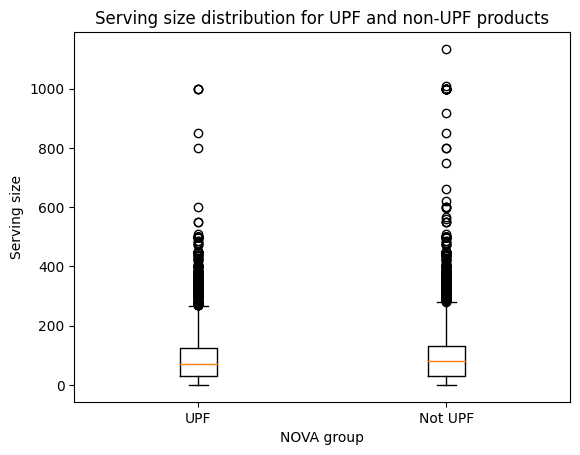

In [507]:
plt.boxplot([ss_upf, ss_notupf], labels=['UPF', 'Not UPF'])
plt.ylabel('Serving size')
plt.xlabel('NOVA group')
plt.title('Serving size distribution for UPF and non-UPF products')
plt.suptitle('')
plt.show()

In [508]:
# perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(ss_upf, ss_notupf)

# print results
print("Mann-Whitney U test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test:
Statistic: 19984825.0
p-value: 0.2222122536384179


The IQR for both UPFs and non-UPFs appears similar, suggesting comparable variability in serving sizes within the middle 50% of the data for both groups. Both groups show a similar spread of outliers, indicating that both UPFs and non-UPFs have serving sizes with extreme values.

The box plot supports the outcome from the Mann-Whitney U test by showing overlapping distributions for both groups, with similar medians, IQRs, and ranges.

The box plot aligns with the Mann-Whitney U test results, supporting the understanding that there is no significant difference in the serving sizes of ultra-processed foods compared to non-ultra-processed foods. This visual representation helps validate the statistical analysis and provides a clear, intuitive way to compare the distributions of serving sizes across the two groups.

## **Hypothesis 04**

**H0:** There is no difference in the healthiness of foods labeled as 'low-fat,' 'gluten-free,' or 'vegan'.

**H1:** There is a difference in the healthiness of foods labeled as 'low-fat,' 'gluten-free,' or 'vegan'.

**Test:** Chi-squared test

**Assumptions:** Categorical variables; Independent observations; Expected frequency in each cell ≥ 5	

**Justification:** This test is suitable for examining the association between categorical variables (food labels and healthiness).

**Limitation:** Chi-squared test does not indicate strength or direction of association.	

**Conclusion - Reject H0**\
The chi-square test results indicate a Chi-Square Statistic of 140.48 with a p-value of 2.10e-32. This extremely low p-value suggests a highly significant difference in the healthiness of foods labeled as "low-fat," "gluten-free," or "vegan" compared to those that are not labeled as such. The significant result implies that foods labeled as "low-fat," "gluten-free," or "vegan" (LFGFVG) differ in their healthiness (as measured by NutriScore) from foods that do not carry these labels. Specifically, the labels appear to be associated with a significant difference in the proportion of foods that are considered healthy (NutriScore A or B) versus unhealthy (NutriScore C, D, or E).

One limitation of this test is the reductionist approach of the Nutri-Scores system which reduces the complex nutritional profile of foods to a single letter grade (A to E). This simplification might not capture the complete nutritional quality of food items.

In [345]:
lfgfvg = data[data['labels_en'].str.contains('low-fat|gluten-free|vegan', na=False)]
not_lfgfvg = data[~data['labels_en'].str.contains('low-fat|gluten-free|vegan', na=True)]

In [346]:
df_lfgfvg = pd.DataFrame([
    lfgfvg['nutriscore_grade'].value_counts().sort_index(),
    not_lfgfvg['nutriscore_grade'].value_counts().sort_index()
    ], index=['LFGFVG', 'Not LFGFVG']).T.iloc[:-2,:]

df_lfgfvg

healthy = df_lfgfvg.iloc[:2].sum()
unhealthy = df_lfgfvg.iloc[-3:].sum()

cross_tab=pd.DataFrame([healthy, unhealthy], index=['Healthy', 'Unhealthy'])
cross_tab

,LFGFVG,Not LFGFVG
Healthy,15,4007
Unhealthy,26,5580


In [347]:
# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

# Interpretation
if p < 0.05:
    print("There is a significant difference in the healthiness of foods labeled as 'low-fat,' 'gluten-free,' or 'vegan'.")
else:
    print("There is no significant difference in the healthiness of foods labeled as 'low-fat,' 'gluten-free,' or 'vegan'.")

Chi-Square Statistic: 0.2666867651888606
P-value: 0.6055630277724326
There is no significant difference in the healthiness of foods labeled as 'low-fat,' 'gluten-free,' or 'vegan'.


# **Archive**

## **Nutrient Profile Model**

In [348]:
from utility import calculate_nutrient_profile_score

In [349]:
nutrient_df = df_uk[['code','url','product_name', 'labels_en', 'food_groups_en', 'energy-kcal_100g', 'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'fiber_100g', 'proteins_100g']]
nutrient_df.dropna(axis=0, how='any', inplace=True)
nutrient_df.head()

/var/folders/j2/dgz87tgd2wv8fr4rj3chms_c0000gn/T/ipykernel_33128/2832394266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrient_df.dropna(axis=0, how='any', inplace=True)


,code,url,product_name,labels_en,food_groups_en,energy-kcal_100g,saturated-fat_100g,sugars_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,fiber_100g,proteins_100g
65,653930006,http://world-en.openfoodfacts.org/product/0000...,porridge,No added sugar,"Cereals and potatoes,Breakfast cereals",371.0,4.1,16.0,0.01,34.25,8.9,11.0
80,932832366,http://world-en.openfoodfacts.org/product/0000...,Absolute Black,"Vegetarian,Vegan","Sugary snacks,Biscuits and cakes",604.0,33.0,2.7,0.02,0.00,17.0,13.0
94,11501,http://world-en.openfoodfacts.org/product/0001...,Curiously Strong Mints,"No artificial flavors,Green Dot,No artificial ...","Sugary snacks,Sweets",398.0,0.5,96.0,0.00,0.00,0.1,0.9
96,11600,http://world-en.openfoodfacts.org/product/0001...,6 British Large Eggs,"Free range,Source of proteins,British Lion Qua...","Fish‚ Meat‚ Eggs,Eggs",131.0,2.5,0.1,0.38,0.00,0.0,12.6
100,11730,http://world-en.openfoodfacts.org/product/0001...,Cranberry & Orange Cookies,"Vegetarian,Pure butter,Not-suitable-for-nut-al...","Sugary snacks,Biscuits and cakes",430.0,8.6,41.2,0.75,29.00,2.7,4.4


In [350]:
def nutrient_profile_grader(row):
    drink_keywords = ['drink', 'beverage']
    
    if any(item.lower() in row['food_groups_en'] for item in drink_keywords):
        if row['nutrient_profile_score'] < 1:return 'healthy'
        else: return 'unhealthy'
    else:
        if row['nutrient_profile_score'] < 4: return 'healthy'
        else: return 'unhealthy'

In [352]:
nutrient_df['nutrient_profile_score'] = nutrient_df.apply(
    lambda x: calculate_nutrient_profile_score(dict(x[5:])), axis=1)

lfgfvg_nutrient_df = nutrient_df[nutrient_df['labels_en'].str.contains('low-fat|gluten-free|vegan', na=False)]
lfgfvg_nutrient_df['nutrient_profile_grade'] = lfgfvg_nutrient_df.apply(lambda x: nutrient_profile_grader(x), axis=1)
lfgfvg_nutrient_df.head()

/var/folders/j2/dgz87tgd2wv8fr4rj3chms_c0000gn/T/ipykernel_33128/4039791384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrient_df['nutrient_profile_score'] = nutrient_df.apply(
/var/folders/j2/dgz87tgd2wv8fr4rj3chms_c0000gn/T/ipykernel_33128/4039791384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lfgfvg_nutrient_df['nutrient_profile_grade'] = lfgfvg_nutrient_df.apply(lambda x: nutrient_profile_grader(x), axis=1)


,code,url,product_name,labels_en,food_groups_en,energy-kcal_100g,saturated-fat_100g,sugars_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,fiber_100g,proteins_100g,nutrient_profile_score,nutrient_profile_grade
3307,36800478138,http://world-en.openfoodfacts.org/product/0036...,Gluten free pancake waffle mix,"No gluten,Certified gluten-free","Sugary snacks,Biscuits and cakes",350.0,0.0,7.50,1.5625,0.0,0.0,15.00,-4,healthy
15453,858641003276,http://world-en.openfoodfacts.org/product/0858...,Himalayan Pink Salt Lentil Chips,"No gluten,Vegetarian,Halal,Kosher,No artificia...","Salty snacks,Appetizers",500.0,0.0,0.00,1.9600,40.0,3.6,14.29,-4,healthy
18244,20138462,http://world-en.openfoodfacts.org/product/2013...,Mature white cheddar,"Vegetarian,Non-vegan","Milk and dairy products,Cheese",416.0,21.7,0.10,1.8100,0.0,0.0,25.40,5,unhealthy
30764,4088600140261,http://world-en.openfoodfacts.org/product/4088...,Choco Hoops,"Vegetarian,No palm oil,Non-vegan","Cereals and potatoes,Breakfast cereals",357.0,0.3,17.19,0.1700,0.0,3.1,8.20,-2,healthy
34584,40899947,http://world-en.openfoodfacts.org/product/4089...,Sliced mixed peppers,Suitable-for-vegetarians-vegans,"Fruits and vegetables,Vegetables",25.0,0.1,3.70,0.0100,63.0,2.1,0.80,-2,healthy


In [353]:
lfgfvg_nutrient_df['nutrient_profile_grade'].value_counts(normalize=True)

nutrient_profile_grade
healthy      0.766667
unhealthy    0.233333
Name: proportion, dtype: float64

In [444]:
def calculate_nutrient_profile(energy, sat_fat, total_sugar, sodium, fruit_veg_nuts, fibre, protein):
    # Define the scoring thresholds for A and C nutrients
    A_nutrients = {'energy': [335, 670, 1005, 1340, 1675, 2010, 2345, 2680, 3015, 3350],
                   'sat_fat': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'total_sugar': [4.5, 9, 13.5, 18, 22.5, 27, 31, 36, 40, 45],
                   'sodium': [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]}
    
    C_nutrients = {'fruit_veg_nuts': [40, 60, None, None, 80],
                   'fibre': [0.7, 1.4, 2.1, 2.8, 3.5],
                   'protein': [1.6, 3.2, 4.8, 6.4, 8.0]}
    
    # Calculate A points
    def calculate_points(value, thresholds):
        points = 0
        for threshold in thresholds:
            if threshold is not None and value > threshold:
                points += 1
            else:
                break
        return points

    A_points = (calculate_points(energy, A_nutrients['energy']) +
                calculate_points(sat_fat, A_nutrients['sat_fat']) +
                calculate_points(total_sugar, A_nutrients['total_sugar']) +
                calculate_points(sodium, A_nutrients['sodium']))
    
    # Calculate C points
    C_points = (calculate_points(fruit_veg_nuts, C_nutrients['fruit_veg_nuts']) +
                calculate_points(fibre, C_nutrients['fibre']) +
                calculate_points(protein, C_nutrients['protein']))
    
    # Calculate overall score
    if A_points >= 11 and calculate_points(fruit_veg_nuts, C_nutrients['fruit_veg_nuts']) < 5:
        overall_score = A_points - (calculate_points(fruit_veg_nuts, C_nutrients['fruit_veg_nuts']) + calculate_points(fibre, C_nutrients['fibre']))
    else:
        overall_score = A_points - C_points
    
    # Determine if the product is 'less healthy'
    is_less_healthy = overall_score >= 4
    
    return overall_score, is_less_healthy

# Example usage:
energy = 459
sat_fat = 1.8
total_sugar = 13.4
sodium = 0.1
fruit_veg_nuts = 8
fibre = 0.6
protein = 6.5

score, less_healthy = calculate_nutrient_profile(energy, sat_fat, total_sugar, sodium, fruit_veg_nuts, fibre, protein)
print(f"Score: {score}, Less Healthy: {less_healthy}")

Score: 0, Less Healthy: False


In [ ]:
# data = df_uk[
#     df_uk['serving_quantity'].notna() & 
#     df_uk['nova_group'].notna() & 
#     df_uk['energy-kcal_100g'].notna() &
#     df_uk['product_quantity'].notna()
#     ][['serving_quantity', 'nova_group', 'energy-kcal_100g', 'product_quantity']]

# # determine energy per serving
# data['energy_per_serving'] = data['energy-kcal_100g']/100 * data['serving_quantity']

# # determine energy density
# data['energy_density'] = data['energy-kcal_100g']/100 * data['product_quantity']

# # remove processed culinary ingredients (NOVA group 2)
# data = data[data['nova_group'] != 2]

# # box plot of energy per serving by NOVA group
# data.boxplot(column='energy_per_serving', by='nova_group', showfliers=False)
# plt.ylabel('Energy per serving (kcal)')
# plt.xlabel('NOVA group')
# plt.title('Energy range per serving by NOVA group')
# plt.suptitle('')
# plt.show()

In [ ]:
# # box plot of energy per serving by NOVA group
# data.boxplot(column='energy_density', by='nova_group', showfliers=False)
# plt.ylabel('Energy Density (kcal/g)')
# plt.xlabel('NOVA group')
# plt.title('Energy density by NOVA group')
# plt.suptitle('')
# plt.show()